<a href="https://colab.research.google.com/github/nasibehmohammadi/Thesis/blob/main/1knn_d1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

file_path = "/content/d1.csv"
df = pd.read_csv(file_path)

print("🔍 بررسی ۵ سطر اول دیتاست:")
print(df.head())

feature_columns = ["B","C","D","E","F","G","H","I","J"]
target_column = "A"

X_data = df[feature_columns].values
y_data = df[target_column].values

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_data)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_data, test_size=0.2, random_state=42)

k = 5
knn_model = KNeighborsClassifier(n_neighbors=k)

knn_model.fit(X_train, y_train)
train_accuracy = knn_model.score(X_train, y_train)
test_accuracy = knn_model.score(X_test, y_test)

print(f"✅ دقت مدل روی داده‌های آموزش: {train_accuracy * 100:.2f}%")
print(f"✅ دقت مدل روی داده‌های تست: {test_accuracy * 100:.2f}%")
y_pred = knn_model.predict(X_test)


print("\n📊 گزارش طبقه‌بندی:")
print(classification_report(y_test, y_pred))

print("\n📌 ماتریس درهم‌ریختگی:")
print(confusion_matrix(y_test, y_pred))

test_sample = X_test[0].reshape(1, -1)
prediction = knn_model.predict(test_sample)

if prediction == 1:
    print("🚨 ورود مشکوک! نیاز به احراز هویت بیشتر.")
else:
    print("✅ ورود ایمن است.")


🔍 بررسی ۵ سطر اول دیتاست:
   A      B      C       D       E       F       G       H       I       J
0  1  39353  85475  117961  118300  123472  117905  117906  290919  117908
1  1  17183   1540  117961  118343  123125  118536  118536  308574  118539
2  1  36724  14457  118219  118220  117884  117879  267952   19721  117880
3  1  36135   5396  117961  118343  119993  118321  240983  290919  118322
4  1  42680   5905  117929  117930  119569  119323  123932   19793  119325
✅ دقت مدل روی داده‌های آموزش: 94.84%
✅ دقت مدل روی داده‌های تست: 94.05%

📊 گزارش طبقه‌بندی:
              precision    recall  f1-score   support

           0       0.41      0.13      0.20       369
           1       0.95      0.99      0.97      6185

    accuracy                           0.94      6554
   macro avg       0.68      0.56      0.58      6554
weighted avg       0.92      0.94      0.93      6554


📌 ماتریس درهم‌ریختگی:
[[  48  321]
 [  69 6116]]
🚨 ورود مشکوک! نیاز به احراز هویت بیشتر.


In [ ]:
from sklearn.metrics import f1_score


from sklearn.metrics import f1_score

# 1️⃣ پیش‌بینی بر روی مجموعه تست
y_pred = knn_model.predict(X_test)

# 2️⃣ تبدیل احتمالات به برچسب‌های 0 و 1 (اگر مقدار احتمال > 0.5 باشد، کلاس 1 است، در غیر این صورت 0)
y_pred_classes = (y_pred > 0.5).astype(int)

# 3️⃣ محاسبه F1-Score
f1 = f1_score(y_test, y_pred_classes)

print(f"🎯 F1-Score مدل: {f1:.4f}")



🎯 F1-Score مدل: 0.9691


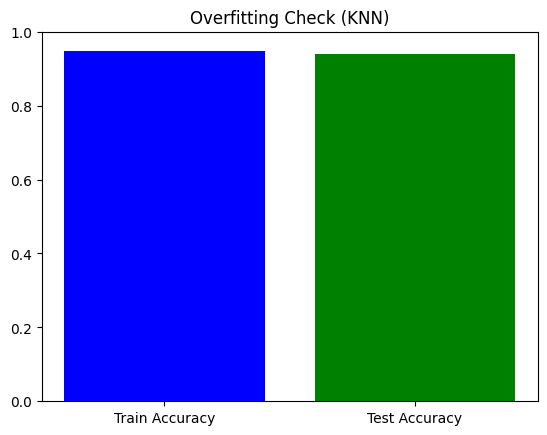

In [ ]:
import matplotlib.pyplot as plt

train_acc = knn_model.score(X_train, y_train)
test_acc = knn_model.score(X_test, y_test)

# 📊 رسم نمودار دقت آموزش و تست
plt.bar(["Train Accuracy", "Test Accuracy"], [train_acc, test_acc], color=["blue", "green"])
plt.ylim(0, 1)
plt.title("Overfitting Check (KNN)")
plt.show()
